*Note: This notebook is the slide-oriented version; a [fully literate (wordy) version](https://drive.google.com/file/d/1EOVkroIz4oIxL53YnTWIxTJBtFvLPZZM/view?usp=sharing) of the notebook is also available. This notebook was designed to be viewed as slides via the [RISE](https://rise.readthedocs.io/en/stable/) notebook extension!*

# Data Preparation I

Data preparation is a *very* broad and central subject in Data Science.

In today's first lecture we'll cover a few key topics:
1. Data "Unboxing"
2. Structural Data Transformations
3. Type Induction/Coercion
4. String Manipulation

## 1. "Unboxing" Data
Recall some basic tools:
- `du -h`: show the disk size of a file in human-readable form
- `head -c 1024`: show me the first 1024 bytes of a file
- your eyes

### Assessing Structure
1. Look out for header info, metadata, comments, etc.
2. Most files you'll run across fall into one of these categories:
  1. **Record per line**: newline-delimited rows of uniform symbol-delimited data.
    - E.g. CSV and TSV files
    - Also newline-delimited rows of uniform but ad-hoc structured text
  2. **Dictionaries/Objects**: explicit key:value pairs, may be nested! Two common cases:
    - Object-per-line: e.g. newline-delimited rows of JSON, XML, YAML, etc. (JSON in this format is sometimes called [json lines or jsonl](https://jsonlines.org/)).
    - Complex object: the entire dataset is one fully-nested JSON, XML or YAML object
  

  3. **Unions**: a mixture of rows from *k* distinct schemas. Two common cases:
    - *Tagged Unions*: each row has an ID or name identifying its schema. Often the tag is in the first column.
    - *Untagged Unions*: the schema for the row must be classified by its content
  4. **Natural Language (prose)**: intended for human consumption.
  5. **Everything else**: A long tail of file formats! If not readable as text, likely some commercial or open source tool will translate.

### Text formats
Be aware of:
- EBCDIC vs. ASCII. 
- Multibyte character encodings 😟: Unicode, UTF-8 and more. You can search the web for resources on these issues.
You can ignore for this class (and often---but not always!---in life).

### Examples
Without further ado, let's unbox some data!

In [7]:
!du -h lec12_data/*

1.3M	lec12_data/jc1.txt
 50M	lec12_data/jq2.txt
4.0K	lec12_data/mm.txt
696K	lec12_data/mmp.txt
4.0M	lec12_data/mmr.txt
824K	lec12_data/mpf.txt
1.2M	lec12_data/original/rainfallscrape/output
2.3M	lec12_data/original/rainfallscrape
 57M	lec12_data/original


In [8]:
!head -c 2048 lec12_data/jc1.txt

﻿_input,_num,_widgetName,_source,_resultNumber,_pageUrl,game_number,bio1,bio2,bio3,contestant1_name,contestant1_score,contestant2_name,contestant2_score,contestant3_name,contestant3_score
,1,Jeopardy_Winners,Jeopardy_Winners,1,http://www.j-archive.com/showgame.php?game_id=3350,Show #5883 - Wednesday March 24 2010,Derek Honoré an attorney from Inglewood California,Tatiana Walton a graphic designer from Cutler Bay Florida,Regina Robbins an arts teacher from New York New York (whose 1-day cash winnings total $38500),Regina,$19401,Tatiana,$7100,Derek,$11900
,2,Jeopardy_Winners,Jeopardy_Winners,2,http://www.j-archive.com/showgame.php?game_id=4400,Show #6756 - Monday January 20 2014,Jon McGuire a software-development manager from Matthews North Carolina,Blake Perkins an environmental scientist from Baton Rouge Louisiana,Sarah McNitt a study abroad adviser originally from Ann Arbor Michigan (whose 4-day cash winnings total $69199),Sarah,$20199,Blake,$0,Jon,$8380
,3,Jeopardy_Winners,Jeopardy_W

What category of data is the file above? Any observations about the data?

Let's look at another:

In [9]:
!head -c 1024 lec12_data/jq2.txt

{"category":"HISTORY","air_date":"2004-12-31","question":"'For the last 8 years of his life, Galileo was under house arrest for espousing this man's theory'","value":"$200","answer":"Copernicus","round":"Jeopardy!","show_number":"4680"}
{"category":"ESPN's TOP 10 ALL-TIME ATHLETES","air_date":"2004-12-31","question":"'No. 2: 1912 Olympian; football star at Carlisle Indian School; 6 MLB seasons with the Reds, Giants & Braves'","value":"$200","answer":"Jim Thorpe","round":"Jeopardy!","show_number":"4680"}
{"category":"EVERYBODY TALKS ABOUT IT...","air_date":"2004-12-31","question":"'The city of Yuma in this state has a record average of 4,055 hours of sunshine each year'","value":"$200","answer":"Arizona","round":"Jeopardy!","show_number":"4680"}
{"category":"THE COMPANY LINE","air_date":"2004-12-31","question":"'In 1963, live on \"The Art Linkletter Show\", this company served its billionth burger'","value":"$200","answer":"McDonald\\'s","round":"Jeopardy!","show_number":"4680"}
{"categ

What do you see this time? Category? Interesting features of the data?

Keep in mind: this is *data visualization*! 

### Working With Data

In [114]:
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd

jc1 = pd.read_csv('lec12_data/jc1.txt', header=0, sep=',')
jc1.dtypes

_input               float64
_num                   int64
_widgetName           object
_source               object
_resultNumber          int64
_pageUrl              object
game_number           object
bio1                  object
bio2                  object
bio3                  object
contestant1_name      object
contestant1_score     object
contestant2_name      object
contestant2_score     object
contestant3_name      object
contestant3_score     object
dtype: object

Currently, we're working with objects, because of how pandas read in the dtypes. Let's try to modify some scores here for contestants to make them numbers

In [11]:
for col in jc1.columns:
    if '_score' in col:
        jc1[col] = jc1[col].map(lambda x: float(x.strip('$')) if type(x) == str else np.nan)

What are our dtypes now?

In [12]:
jc1.dtypes

_input               float64
_num                   int64
_widgetName           object
_source               object
_resultNumber          int64
_pageUrl              object
game_number           object
bio1                  object
bio2                  object
bio3                  object
contestant1_name      object
contestant1_score    float64
contestant2_name      object
contestant2_score    float64
contestant3_name      object
contestant3_score    float64
dtype: object

Can we visualize our contestant winnings?

array([[<AxesSubplot: title={'center': 'contestant3_score'}>]],
      dtype=object)

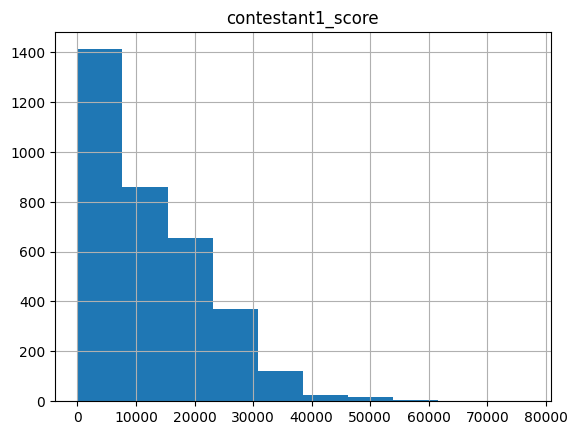

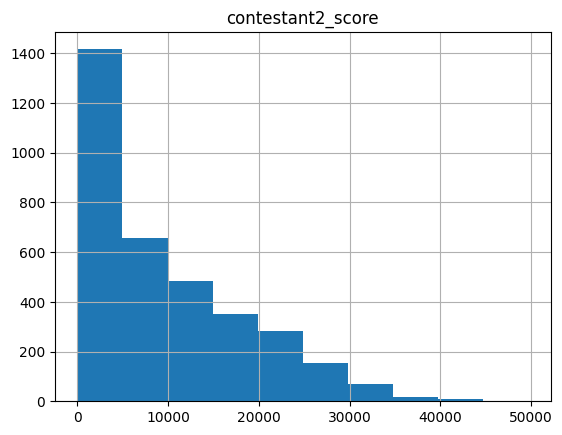

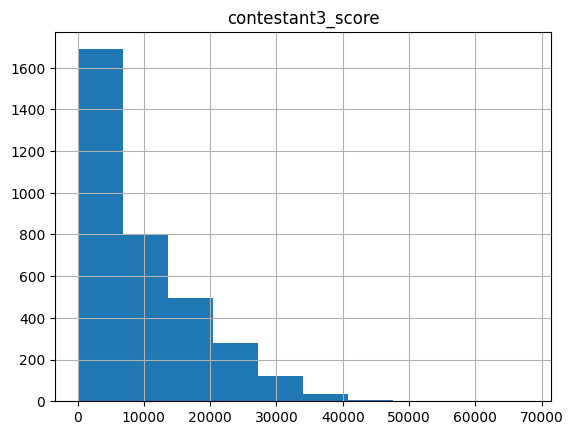

In [13]:
jc1.hist(column='contestant1_score')
jc1.hist(column='contestant2_score')
jc1.hist(column='contestant3_score')

### Let's Look at More Files!

OK, moving on to another file. How would you describe this one?

In [14]:
!head -c 1024 lec12_data/mm.txt

Year,OCT,NOV,DEC,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP
2002,0.00,6.03,7.18,0.82,2.01,9.96,4.74,0.78,0.13,0.00,0.09,0.00
2003,0.00,6.03,7.18,0.82,2.01,9.96,4.74,0.78,0.13,0.00,0.09,0.00
2004,0.00,6.03,7.18,0.82,2.01,9.96,4.74,0.78,0.13,0.00,0.09,0.00
2005,0.00,6.03,7.18,0.82,2.01,9.96,4.74,0.78,0.13,0.00,0.09,0.00
2006,0.00,6.03,7.18,0.82,2.01,9.96,4.74,0.78,0.13,0.00,0.09,0.00
2007,0.00,6.03,7.18,0.82,2.01,9.96,4.74,0.78,0.13,0.00,0.09,0.00
2008,0.00,6.03,7.18,0.82,2.01,9.96,4.74,0.78,0.13,0.00,0.09,0.00
2009,0.00,6.03,7.18,0.82,2.01,9.96,4.74,0.78,0.13,0.00,0.09,0.00
2010,0.00,6.03,7.18,0.82,2.01,9.96,4.74,0.78,0.13,0.00,0.09,0.00
2011,0.00,6.03,7.18,0.82,2.01,9.96,4.74,0.78,0.13,0.00,0.09,0.00
2012,0.00,6.03,7.18,0.82,2.01,9.96,4.74,0.78,0.13,0.00,0.09,0.00
2013,0.00,6.03,7.18,0.82,2.01,9.96,4.74,0.78,0.13,0.00,0.09,0.00
2014,0.00,6.03,7.18,0.82,2.01,9.96,4.74,0.78,0.13,0.00,0.09,0.00
2015,0.00,6.03,7.18,0.82,2.01,9.96,4.74,0.78,0.13,0.00,0.09,0.00
2016,0.00,6.03,7.18,0.82,2.01,9.96,4.

How does that differ from the next file?

In [15]:
!head -c 1024 lec12_data/mmp.txt

"Year","Location","Station Name","OCT","NOV","DEC","JAN","FEB","MAR","APR","MAY","JUN","JUL","AUG","SEP"
"2002","ASHLAND","SOUTHERN OREGON COASTAL","0.86","0.49","2.12","3.42","1.38","1.00","0.36","2.30","1.54","0.00","0.00","0.16"
"2002","CAVE JUNCTION","SOUTHERN OREGON COASTAL","","","","","","","","","","","",""
"2002","GOLD BEACH","SOUTHERN OREGON COASTAL","","","","","","","","","","","",""
"2002","GRANTS PASS KAJO","SOUTHERN OREGON COASTAL","0.61","1.21","4.19","6.31","0.24","0.77","0.58","2.02","0.87","0.00","0.00","0.20"
"2002","GREEN SPRINGS PP","SOUTHERN OREGON COASTAL","0.35","0.75","2.44","4.14","0.66","","0.26","2.59","","","0.00","0.20"
"2002","LEMOLO LAKE","SOUTHERN OREGON COASTAL","3.68","1.81","5.59","18.19","4.34","4.32","3.37","4.05","2.52","0.00","0.02","2.33"
"2002","MEDFORD","SOUTHERN OREGON COASTAL","0.65","0.24","2.86","3.43","0.51","0.74","0.46","2.50","1.20","0.00","0.00","0.05"
"2002","NORTH BEND","SOUTHERN OREGON COASTAL","2.43","2.10","9.16","7.73","2.85","

And how about this one?

In [16]:
!head -c 1024 lec12_data/mmr.txt

"Year","Location","Station Name","Month","Inches of Precipitation"
"2002","ASHLAND","SOUTHERN OREGON COASTAL","OCT","0.86"
"2002","ASHLAND","SOUTHERN OREGON COASTAL","NOV","0.49"
"2002","ASHLAND","SOUTHERN OREGON COASTAL","DEC","2.12"
"2002","ASHLAND","SOUTHERN OREGON COASTAL","JAN","3.42"
"2002","ASHLAND","SOUTHERN OREGON COASTAL","FEB","1.38"
"2002","ASHLAND","SOUTHERN OREGON COASTAL","MAR","1.00"
"2002","ASHLAND","SOUTHERN OREGON COASTAL","APR","0.36"
"2002","ASHLAND","SOUTHERN OREGON COASTAL","MAY","2.30"
"2002","ASHLAND","SOUTHERN OREGON COASTAL","JUN","1.54"
"2002","ASHLAND","SOUTHERN OREGON COASTAL","JUL","0.00"
"2002","ASHLAND","SOUTHERN OREGON COASTAL","AUG","0.00"
"2002","ASHLAND","SOUTHERN OREGON COASTAL","SEP","0.16"
"2002","CAVE JUNCTION","SOUTHERN OREGON COASTAL","OCT",""
"2002","CAVE JUNCTION","SOUTHERN OREGON COASTAL","NOV",""
"2002","CAVE JUNCTION","SOUTHERN OREGON COASTAL","DEC",""
"2002","CAVE JUNCTION","SOUTHERN OREGON COASTAL","JAN",""
"2002","CAVE JUNCTION","SOUTH

## 2. Structural Transformation: From Relations to Matrices and Back
- Matrix $\rightarrow$ Relational works.
- Relational $\rightarrow$ Matrix sometimes works!
- But how?

To start, let's take our matrix in `mm.txt`, and load it into Pandas.

In [25]:
mm = pd.read_csv('lec12_data/mm.txt', header=0)
mm

,Year,OCT,NOV,DEC,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP
0,2002,0.0,6.03,7.18,0.82,2.01,9.96,4.74,0.78,0.13,0.0,0.09,0.0
1,2003,0.0,6.03,7.18,0.82,2.01,9.96,4.74,0.78,0.13,0.0,0.09,0.0
2,2004,0.0,6.03,7.18,0.82,2.01,9.96,4.74,0.78,0.13,0.0,0.09,0.0
3,2005,0.0,6.03,7.18,0.82,2.01,9.96,4.74,0.78,0.13,0.0,0.09,0.0
4,2006,0.0,6.03,7.18,0.82,2.01,9.96,4.74,0.78,0.13,0.0,0.09,0.0
5,2007,0.0,6.03,7.18,0.82,2.01,9.96,4.74,0.78,0.13,0.0,0.09,0.0
6,2008,0.0,6.03,7.18,0.82,2.01,9.96,4.74,0.78,0.13,0.0,0.09,0.0
7,2009,0.0,6.03,7.18,0.82,2.01,9.96,4.74,0.78,0.13,0.0,0.09,0.0
8,2010,0.0,6.03,7.18,0.82,2.01,9.96,4.74,0.78,0.13,0.0,0.09,0.0
9,2011,0.0,6.03,7.18,0.82,2.01,9.96,4.74,0.78,0.13,0.0,0.09,0.0


What does an unpivot look like (Matrix -> Relational)?

In [26]:
mm_melted = mm.melt(id_vars=['Year'])
mm_melted

,Year,variable,value
0,2002,OCT,0.0
1,2003,OCT,0.0
2,2004,OCT,0.0
3,2005,OCT,0.0
4,2006,OCT,0.0
...,...,...,...
223,2016,SEP,0.0
224,2017,SEP,0.0
225,2018,SEP,0.0
226,2019,SEP,0.0


PIVOT(UNPIVOT) = ??

In [27]:
# mm_melted.pivot(index='variable', columns='Year')
mm_melted.pivot(index='Year', columns='variable')

value                                                               
variable   APR   AUG   DEC   FEB   JAN  JUL   JUN   MAR   MAY   NOV  OCT  SEP
Year                                                                         
2002      4.74  0.09  7.18  2.01  0.82  0.0  0.13  9.96  0.78  6.03  0.0  0.0
2003      4.74  0.09  7.18  2.01  0.82  0.0  0.13  9.96  0.78  6.03  0.0  0.0
2004      4.74  0.09  7.18  2.01  0.82  0.0  0.13  9.96  0.78  6.03  0.0  0.0
2005      4.74  0.09  7.18  2.01  0.82  0.0  0.13  9.96  0.78  6.03  0.0  0.0
2006      4.74  0.09  7.18  2.01  0.82  0.0  0.13  9.96  0.78  6.03  0.0  0.0
2007      4.74  0.09  7.18  2.01  0.82  0.0  0.13  9.96  0.78  6.03  0.0  0.0
2008      4.74  0.09  7.18  2.01  0.82  0.0  0.13  9.96  0.78  6.03  0.0  0.0
2009      4.74  0.09  7.18  2.01  0.82  0.0  0.13  9.96  0.78  6.03  0.0  0.0
2010      4.74  0.09  7.18  2.01  0.82  0.0  0.13  9.96  0.78  6.03  0.0  0.0
2011      4.74  0.09  7.18  2.01  0.82  0.0  0.13  9.96  0.78  6.03  0.0  0.0
2012      4.74  0.09  7.18  2.01  0.82  0.0  0.13  9.96  0.78  6.03  0.0  0.0
2013      4.74  0.09  7.18  2.01  0.82  0.0  0.13  9.96  0.78  6.03  0.0  0.0
2014      4.74  0.09  7.18  2.01  0.82  0.0  0.13  9.96  0.78  6.03  0.0  0.0
2015      4.74  0.09  7.18  2.01  0.82  0.0  0.13  9.96  0.78  6.03  0.0  0.0
2016      4.74  0.09  7.18  2.01  0.82  0.0  0.13  9.96  0.78  6.03  0.0  0.0
2017      4.74  0.09  7.18  2.01  0.82  0.0  0.13  9.96  0.78  6.03  0.0  0.0
2018      4.74  0.09  7.18  2.01  0.82  0.0  0.13  9.96  0.78  6.03  0.0  0.0
2019      4.74  0.09  7.18  2.01  0.82  0.0  0.13  9.96  0.78  6.03  0.0  0.0
2020      4.74  0.09  7.18  2.01  0.82  0.0  0.13  9.96  0.78  6.03  0.0  0.0

### Extra Columns
Let's go back to `mmp.txt`. 
- Matrix or relation? 
- Try doing some PIVOT/UNPIVOT work on this.

In [28]:
mmp = pd.read_csv('lec12_data/mmp.txt', header=0)
mmp

,Year,Location,Station Name,OCT,NOV,DEC,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP
0,2002,ASHLAND,SOUTHERN OREGON COASTAL,0.86,0.49,2.12,3.42,1.38,1.00,0.36,2.30,1.54,0.00,0.00,0.16
1,2002,CAVE JUNCTION,SOUTHERN OREGON COASTAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2002,GOLD BEACH,SOUTHERN OREGON COASTAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2002,GRANTS PASS KAJO,SOUTHERN OREGON COASTAL,0.61,1.21,4.19,6.31,0.24,0.77,0.58,2.02,0.87,0.00,0.00,0.20
4,2002,GREEN SPRINGS PP,SOUTHERN OREGON COASTAL,0.35,0.75,2.44,4.14,0.66,NaN,0.26,2.59,NaN,NaN,0.00,0.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5695,2020,WENDOVER,GREAT SALT LAKE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5696,2020,GREAT BASIN N P,GREAT SALT LAKE,0.13,2.52,0.84,0.20,NaN,2.94,0.97,0.07,0.44,0.43,0.00,0.02
5697,2020,MONTELLO,GREAT SALT LAKE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5698,2020,CEDAR CITY 5E,ESCALANTE DESERT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
# Unpivot
mmp_melted = mmp.melt(id_vars=['Location', 'Station Name', 'Year'])
mmp_melted

,Location,Station Name,Year,variable,value
0,ASHLAND,SOUTHERN OREGON COASTAL,2002,OCT,0.86
1,CAVE JUNCTION,SOUTHERN OREGON COASTAL,2002,OCT,NaN
2,GOLD BEACH,SOUTHERN OREGON COASTAL,2002,OCT,NaN
3,GRANTS PASS KAJO,SOUTHERN OREGON COASTAL,2002,OCT,0.61
4,GREEN SPRINGS PP,SOUTHERN OREGON COASTAL,2002,OCT,0.35
...,...,...,...,...,...
68395,WENDOVER,GREAT SALT LAKE,2020,SEP,NaN
68396,GREAT BASIN N P,GREAT SALT LAKE,2020,SEP,0.02
68397,MONTELLO,GREAT SALT LAKE,2020,SEP,NaN
68398,CEDAR CITY 5E,ESCALANTE DESERT,2020,SEP,NaN


In [31]:
# Repivot the unpivot

# mmp_melted.pivot(index='Year', columns='variable')
mmp_melted.pivot(index=['Location', 'Station Name', 'Year'], columns='variable')

value                    \
variable                                               APR   AUG   DEC   FEB   
Location            Station Name                Year                           
 "LA INT'L AIRPORT" SOUTHERN CALIFORNIA COASTAL 2002  2.68  0.00  4.42  0.00   
                                                2003  2.68  0.00  4.42  0.00   
                                                2004  2.68  0.00  4.42  0.00   
                                                2005  2.68  0.00  4.42  0.00   
                                                2006  2.68  0.00  4.42  0.00   
...                                                    ...   ...   ...   ...   
YREKA               LOWER KLAMATH               2016  0.73  0.08  2.02  0.03   
                                                2017  0.73  0.08  2.02  0.03   
                                                2018  0.73  0.08  2.02  0.03   
                                                2019  0.73  0.08  2.02  0.03   
                                                2020  0.73  0.08  2.02  0.03   

                                                                              \
variable                                               JAN   JUL   JUN   MAR   
Location            Station Name                Year                           
 "LA INT'L AIRPORT" SOUTHERN CALIFORNIA COASTAL 2002  0.38  0.00  0.00  4.11   
                                                2003  0.38  0.00  0.00  4.11   
                                                2004  0.38  0.00  0.00  4.11   
                                                2005  0.38  0.00  0.00  4.11   
                                                2006  0.38  0.00  0.00  4.11   
...                                                    ...   ...   ...   ...   
YREKA               LOWER KLAMATH               2016  2.08  0.11  0.27  0.96   
                                                2017  2.08  0.11  0.27  0.96   
                                                2018  2.08  0.11  0.27  0.96   
                                                2019  2.08  0.11  0.27  0.96   
                                                2020  2.08  0.11  0.27  0.96   

                                                                              
variable                                               MAY   NOV   OCT   SEP  
Location            Station Name                Year                          
 "LA INT'L AIRPORT" SOUTHERN CALIFORNIA COASTAL 2002  0.12  1.43  0.00  0.00  
                                                2003  0.12  1.43  0.00  0.00  
                                                2004  0.12  1.43  0.00  0.00  
                                                2005  0.12  1.43  0.00  0.00  
                                                2006  0.12  1.43  0.00  0.00  
...                                                    ...   ...   ...   ...  
YREKA               LOWER KLAMATH               2016  2.03  0.66  0.43  0.02  
                                                2017  2.03  0.66  0.43  0.02  
                                                2018  2.03  0.66  0.43  0.02  
                                                2019  2.03  0.66  0.43  0.02  
                                                2020  2.03  0.66  0.43  0.02  

[5700 rows x 12 columns]

### Duplicate Entries and Aggregation
Now let's take relational version in the `mmr.txt` file, PIVOT into `year`x`month` form.

In [33]:
mmr = pd.read_csv('lec12_data/mmr.txt')
mmr

,Year,Location,Station Name,Month,Inches of Precipitation
0,2002,ASHLAND,SOUTHERN OREGON COASTAL,OCT,0.86
1,2002,ASHLAND,SOUTHERN OREGON COASTAL,NOV,0.49
2,2002,ASHLAND,SOUTHERN OREGON COASTAL,DEC,2.12
3,2002,ASHLAND,SOUTHERN OREGON COASTAL,JAN,3.42
4,2002,ASHLAND,SOUTHERN OREGON COASTAL,FEB,1.38
...,...,...,...,...,...
68395,2020,ENTERPRISE,ESCALANTE DESERT,MAY,0.07
68396,2020,ENTERPRISE,ESCALANTE DESERT,JUN,0.00
68397,2020,ENTERPRISE,ESCALANTE DESERT,JUL,0.00
68398,2020,ENTERPRISE,ESCALANTE DESERT,AUG,0.11


Let's say somebody asked for *just* the precipitation grouped by year and month, with no location data.
- What are they asking for? This isn't intuitive, because we have location data as well. What do we do?
- How do we pivot this into year x month form?

In [34]:
mmr_grouped = mmr.groupby(['Year', 'Month']).mean('Inches of Precipitation')
mmr_grouped = mmr_grouped.reset_index()
mmr_pivoted = mmr_grouped.pivot(index='Year', columns='Month')
mmr_pivoted

Inches of Precipitation                                          \
Month                     APR       AUG       DEC       FEB       JAN   
Year                                                                    
2002                 2.079592  0.103135  4.790359  0.278024  2.332782   
2003                 2.079592  0.103135  4.790359  0.278024  2.332782   
2004                 2.079592  0.103135  4.790359  0.278024  2.332782   
2005                 2.079592  0.103135  4.790359  0.278024  2.332782   
2006                 2.079592  0.103135  4.790359  0.278024  2.332782   
2007                 2.079592  0.103135  4.790359  0.278024  2.332782   
2008                 2.079592  0.103135  4.790359  0.278024  2.332782   
2009                 2.079592  0.103135  4.790359  0.278024  2.332782   
2010                 2.079592  0.103135  4.790359  0.278024  2.332782   
2011                 2.079592  0.103135  4.790359  0.278024  2.332782   
2012                 2.079592  0.103135  4.790359  0.278024  2.332782   
2013                 2.079592  0.103135  4.790359  0.278024  2.332782   
2014                 2.079592  0.103135  4.790359  0.278024  2.332782   
2015                 2.079592  0.103135  4.790359  0.278024  2.332782   
2016                 2.079592  0.103135  4.790359  0.278024  2.332782   
2017                 2.079592  0.103135  4.790359  0.278024  2.332782   
2018                 2.079592  0.103135  4.790359  0.278024  2.332782   
2019                 2.079592  0.103135  4.790359  0.278024  2.332782   
2020                 2.079592  0.103135  4.790359  0.278024  2.332782   

                                                                             
Month       JUL       JUN       MAR       MAY       NOV       OCT       SEP  
Year                                                                         
2002   0.071124  0.291605  3.194899  1.521296  1.383289  0.233237  0.087298  
2003   0.071124  0.291605  3.194899  1.521296  1.383289  0.233237  0.087298  
2004   0.071124  0.291605  3.194899  1.521296  1.383289  0.233237  0.087298  
2005   0.071124  0.291605  3.194899  1.521296  1.383289  0.233237  0.087298  
2006   0.071124  0.291605  3.194899  1.521296  1.383289  0.233237  0.087298  
2007   0.071124  0.291605  3.194899  1.521296  1.383289  0.233237  0.087298  
2008   0.071124  0.291605  3.194899  1.521296  1.383289  0.233237  0.087298  
2009   0.071124  0.291605  3.194899  1.521296  1.383289  0.233237  0.087298  
2010   0.071124  0.291605  3.194899  1.521296  1.383289  0.233237  0.087298  
2011   0.071124  0.291605  3.194899  1.521296  1.383289  0.233237  0.087298  
2012   0.071124  0.291605  3.194899  1.521296  1.383289  0.233237  0.087298  
2013   0.071124  0.291605  3.194899  1.521296  1.383289  0.233237  0.087298  
2014   0.071124  0.291605  3.194899  1.521296  1.383289  0.233237  0.087298  
2015   0.071124  0.291605  3.194899  1.521296  1.383289  0.233237  0.087298  
2016   0.071124  0.291605  3.194899  1.521296  1.383289  0.233237  0.087298  
2017   0.071124  0.291605  3.194899  1.521296  1.383289  0.233237  0.087298  
2018   0.071124  0.291605  3.194899  1.521296  1.383289  0.233237  0.087298  
2019   0.071124  0.291605  3.194899  1.521296  1.383289  0.233237  0.087298  
2020   0.071124  0.291605  3.194899  1.521296  1.383289  0.233237  0.087298

### Spreadsheets
- You should try this in your favorite spreadsheet, you may see some differences.
- Beware: there may be no UNPIVOT, or it may be hard to find/use

### PIVOT/UNPIVOT and the Relational Model??!
- In SQL? How about in Relational Algebra?
- Consider how we get "output" column names: $\pi_{c1, c2, c3}(T)$. What's true about the subscripts of $\pi$?
- By contrast, where do output column names come from in PIVOT?
- UNPIVOT: quantifier over column names (variables). This is *second order logic*. Relational langauges are based in first order logic (quantifiers over data).
- So *no* PIVOT/UNPIVOT in "pure" SQL
- BUT: most DBMSs extend SQL to do it. E.g. in Postgres the extension is called [crosstab](https://www.postgresql.org/docs/current/tablefunc.html).

### What about performance and scale
- Have you ever seen a table with 10 million rows? 
- Have you ever seen a table with 10 million columns? 

- Performance
- Usability/Queryability
- Statistics: the [curse of dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality) (and the blessing?!)

## 3. Type Induction and Coercion
To begin let's review "statistical" data types. This is a slight refinement from the terms in DS100:
- *nominal* / *categorical*: types that have no inherent ordering, used as names for categories
- *ordinals*: types that are used to encode order. Typically the integers $1, 2, \ldots$
- *cardinals*: types that are used to express cardinality ("how many"). Typically the integers $0,1,\ldots$. Cardinals are common as the output of statistics (frequencies).
- *numerical* / *measures*: types that capture a numerical value or measurement. Typically a real (floating point) number.

### Data types in the wild
- Some systems (DBMSs) enforce/export types
- Very, very common to work with data that has little or no metadata. Must interpret the data somehow! Type "induction".

### Techniques for Type Induction
- Given: a column $c$ of potentially "dirty" data values
- A set of types H. 
- You need to write an algorithm to choose a type. How does it choose?

- "Hard" Rules: E.g. Occam's razor. 
  - Try types from most- to least-specific. (e.g. boolean, int, float, string)
  - Choose the first one that matches *all* the values.
- Minimum Description Length (MDL): See below
- Classification (i.e. Supervised Learning): You know how this goes.

#### MDL (Minimum Description Length)
- Like Occam's razor in preferring simplicity: shortest description is best.
- But: account for the "weight" or "penalty" of encoding exceptions. 
- Say $len(v)$ is the bit-length for encoding of a value $v$ "explicitly". 
- Given a type $T$ with $|T|$ distinct values, the bit-length of encoding a value in that type is $log|T|$.
- Let's say that indicator variable $I_T(v) = 1$ if $v \in T$, and $0$ otherwise. 

$$\mbox{MDL} = \min_{T \in H} \sum_{v \in c}(I_T(v)log(|T|) + (1-I_T(v))len(v))$$

- Example: $\{\mbox{'Joe'}, 2, 12, 4750\}$. Assume the default type is "string", which costs us 8 bits per character. 
- 16-bit integers: 

In [ ]:
c = ['Joe', '2', '12', '4750']
len('Joe')*8 + 3*16

- All strings: 

In [ ]:
sum([len(x)*8 for x in c])

#### In practice
- Many systems *need* hard rules
- Others lean MDLish

### Type Coercion/Casting
- Can be done. You may lose data fidelity (e.g. set to NULL)
- Can be useful. E.g. for *statistically* correct treatment, convert IDs to string rather than integer.

## 4. String Manipulation
We covered a lot in DS100 and SQL already.

- Typical transforms include the following (names may vary across systems/DSLs):
  - **Split** a string into separate rows/columns
      - Often by position or delimiter
      - Sometimes via parsing: e.g. counting nested parentheses (e.g. JSON/XML rowsplits)
  - **CountMatches**: Create a new column with the count of matches of a pattern in a string column
  - **Extract**: create a column of substrings derived from another column 
  - **Replace**: a (sub)string with a constant, a "captured group", or any string formula (e.g. lowercase, trim, etc)

- Facility with regular expressions goes a VERY long way.
  - Most languages/tools support regex
- All of the string manipulation can be done 
directly in SQL

## Cleaning The Real Data
The previous few files were the results of wrangling a raw dataset. Let's look at that dataset now! It's a scrape of [rainfall data](https://www.cnrfc.noaa.gov/monthly_precip_2020.php) from the website of the National Oceanic and Atmospheric Administration (NOAA).

In [66]:
!head -c 4096 lec12_data/mpf.txt

2002, 'SOUTHERN OREGON COASTAL'
2002, 'ID', 'Location', 'OCT', 'NOV', 'DEC', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'WY to Date', 'Pct Avg to Date', 'Pct Tot WY'
2002, 'ASHO3', 'ASHLAND', '0.86', '0.49', '2.12', '3.42', '1.38', '1.00', '0.36', '2.30', '1.54', '0.00', '0.00', '0.16', '13.63', '68', '68'
2002, 'CVJO3', 'CAVE JUNCTION', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M'
2002, 'GOLO3', 'GOLD BEACH', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M'
2002, 'GPSO3', 'GRANTS PASS KAJO', '0.61', '1.21', '4.19', '6.31', '0.24', '0.77', '0.58', '2.02', '0.87', '0.00', '0.00', '0.20', '17.00', '55', '55'
2002, 'GSPO3', 'GREEN SPRINGS PP', '0.35', '0.75', '2.44', '4.14', '0.66', 'M', '0.26', '2.59', 'M', 'M', '0.00', '0.20', 'M'
2002, 'LEMO3', 'LEMOLO LAKE', '3.68', '1.81', '5.59', '18.19', '4.34', '4.32', '3.37', '4.05', '2.52', '0.00', '0.02', '2.33', '50.22', '76', '76'
2002, 'MFR', 'MEDFORD', '0.65', '0.24', '2.86', '3.43', '0.

Messy! You can play in bash or pandas if you like. Let's calculate the average rainfall per month per location. Firstly, we note that the structure of the file is a bit off. It's hard to read multiple dataframes from a single CSV like this...so let's try to write multiple files and concatenate a df.

In [105]:
curr_file = None
with open('lec12_data/mpf.txt') as f:
    for line in f.readlines():
        splits = line.split(', ')
        if len(splits) == 2:
            print(splits[1])

2002
'SOUTHERN OREGON COASTAL'

2002
'OREGON CLOSED BASINS'

2002
'NORTHERN CALIFORNIA COASTAL'

2002
'UPPER KLAMATH'

2002
'LOWER KLAMATH'

2002
'RUSSIAN...NAPA...SAN FRANCISCO BAY'

2002
'SACRAMENTO...YUBA...FEATHER...AMERICAN'

2002
'SAN JOAQUIN'

2002
'KERN...TULE...KAWEAH...KINGS'

2002
'TULARE-BUENA VISTA LAKES'

2002
'CENTRAL CALIFORNIA COASTAL'

2002
'SOUTHERN CALIFORNIA COASTAL'

2002
'NORTH AND CENTRAL LAHONTAN'

2002
'LAKE TAHOE...TRUCKEE...CARSON...WALKER'

2002
'MOJAVE...MONO LAKE...SALTON SEA'

2002
'HUMBOLDT'

2002
'BLACK ROCK DESERT'

2002
'CENTRAL NEVADA DESERT'

2002
'SNAKE AND COLUMBIA'

2002
'LOWER COLORADO'

2002
'GREAT SALT LAKE'

2002
'ESCALANTE DESERT'

2003
'SOUTHERN OREGON COASTAL'

2003
'OREGON CLOSED BASINS'

2003
'NORTHERN CALIFORNIA COASTAL'

2003
'UPPER KLAMATH'

2003
'LOWER KLAMATH'

2003
'RUSSIAN...NAPA...SAN FRANCISCO BAY'

2003
'SACRAMENTO...YUBA...FEATHER...AMERICAN'

2003
'SAN JOAQUIN'

2003
'KERN...TULE...KAWEAH...KINGS'

2003
'TULARE-BUENA VISTA L

Okay, first, let's create some files; one for each segment. And let's rename them into something more conventional.

In [106]:
curr_file = None
with open('lec12_data/mpf.txt') as f:
    for num, line in enumerate(f.readlines()):
        splits = line.split(', ')
        if len(splits) == 2:
            print(splits[1].strip(" '\n ").replace('...', '-').replace(' ', '_'))

SOUTHERN_OREGON_COASTAL
OREGON_CLOSED_BASINS
NORTHERN_CALIFORNIA_COASTAL
UPPER_KLAMATH
LOWER_KLAMATH
RUSSIAN-NAPA-SAN_FRANCISCO_BAY
SACRAMENTO-YUBA-FEATHER-AMERICAN
SAN_JOAQUIN
KERN-TULE-KAWEAH-KINGS
TULARE-BUENA_VISTA_LAKES
CENTRAL_CALIFORNIA_COASTAL
SOUTHERN_CALIFORNIA_COASTAL
NORTH_AND_CENTRAL_LAHONTAN
LAKE_TAHOE-TRUCKEE-CARSON-WALKER
MOJAVE-MONO_LAKE-SALTON_SEA
HUMBOLDT
BLACK_ROCK_DESERT
CENTRAL_NEVADA_DESERT
SNAKE_AND_COLUMBIA
LOWER_COLORADO
GREAT_SALT_LAKE
ESCALANTE_DESERT
SOUTHERN_OREGON_COASTAL
OREGON_CLOSED_BASINS
NORTHERN_CALIFORNIA_COASTAL
UPPER_KLAMATH
LOWER_KLAMATH
RUSSIAN-NAPA-SAN_FRANCISCO_BAY
SACRAMENTO-YUBA-FEATHER-AMERICAN
SAN_JOAQUIN
KERN-TULE-KAWEAH-KINGS
TULARE-BUENA_VISTA_LAKES
CENTRAL_CALIFORNIA_COASTAL
SOUTHERN_CALIFORNIA_COASTAL
NORTH_AND_CENTRAL_LAHONTAN
LAKE_TAHOE-TRUCKEE-CARSON-WALKER
MOJAVE-MONO_LAKE-SALTON_SEA
HUMBOLDT
BLACK_ROCK_DESERT
CENTRAL_NEVADA_DESERT
SNAKE_AND_COLUMBIA
LOWER_COLORADO
GREAT_SALT_LAKE
ESCALANTE_DESERT
SOUTHERN_OREGON_COASTAL
OREGON_C

That's probably more of what we want! Now, let's actually write our new files...

In [144]:
curr_file = None
with open('lec12_data/mpf.txt') as master_file:
    for line in master_file.readlines():
        splits = line.split(', ')
        if len(splits) == 2:
            if curr_file is not None:
                curr_file.close()
            filename = splits[0] + '_' + splits[1].strip(" '\n ")
            filename = filename.replace('...', '-')
            filename = filename.replace(' ', '_')
            curr_file = open('lec12_data/subfiles/' + filename + '.txt', 'w')
        curr_file.write(line)
curr_file.close()

Now, let's read these files into a dataframe...and we'll need to do a lot of preprocessing!

In [167]:
import os
mpf = pd.DataFrame()
parent_dir = os.getcwd() + '/lec12_data/subfiles/'
for filename in os.listdir(parent_dir):
    # read from the first header. not the second!
    region_df = pd.read_csv(parent_dir + '/' + filename, header=1)
    # BE CAREFUL! Let's rename our schema...because right now, this is problematic.
    # The first column is just labeled as the year itself (e.g. 2007). Not 'Year'.
    region_df = region_df.rename(columns={filename.split('_')[0]: 'Year'})
    mpf = mpf.append(region_df)
mpf = mpf.sort_values('Year')

Now, let's figure out what our data looks like in Pandas.

In [168]:
mpf

,Year,'ID','Location','OCT','NOV','DEC','JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','WY to Date','Pct Avg to Date','Pct Tot WY'
10,2002,'RNO','RENO','0.00','0.40','1.69','0.13','0.04','0.79','0.38','0.05','0.09','0.24','0.13','0.00','3.94','53','53'
4,2002,'EED','NEEDLES','0.00','2.69','1.03','0.00','0.10','2.36','0.50','0.00','0.00','0.00','0.00','0.00','6.68','145','145'
3,2002,'DNWN2','DESERT NTL WILDLIFE REF','0.00','1.25','0.58','0.00','0.31','1.77','0.43','0.00','0.00','0.02','0.00','0.00','4.36','88','88'
2,2002,'CALN2','CALIENTE','0.00','1.62','1.20','0.18','1.20','2.08','0.74','0.05','0.08','0.07','0.00','M','M',NaN,NaN
1,2002,'BULA3','BULLHEAD CITY','M','M','M','M','M','M','M','M','M','M','M','M','M',NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,2020,'ASHO3','ASHLAND','0.86','0.49','2.12','3.42','1.38','1.00','0.36','2.30','1.54','0.00','0.00','0.16','13.63','68','68'
1,2020,'CVJO3','CAVE JUNCTION','M','M','M','M','M','M','M','M','M','M','M','M','M',NaN,NaN
2,2020,'GOLO3','GOLD BEACH','M','M','M','M','M','M','M','M','M','M','M','M','M',NaN,NaN
4,2020,'GSPO3','GREEN SPRINGS PP','0.35','0.75','2.44','4.14','0.66','M','0.26','2.59','M','M','0.00','0.20','M',NaN,NaN


In [169]:
mpf.dtypes

Year                   int64
 'ID'                 object
 'Location'           object
 'OCT'                object
 'NOV'                object
 'DEC'                object
 'JAN'                object
 'FEB'                object
 'MAR'                object
 'APR'                object
 'MAY'                object
 'JUN'                object
 'JUL'                object
 'AUG'                object
 'SEP'                object
 'WY to Date'         object
 'Pct Avg to Date'    object
 'Pct Tot WY'         object
dtype: object

Let's rename our columns!

In [170]:
col_set = {}
for column in mpf.columns:
    if column != 'Year':
        col_set.update({column: column.strip(" '")})
mpf = mpf.rename(columns=col_set)
mpf.columns

Index(['Year', 'ID', 'Location', 'OCT', 'NOV', 'DEC', 'JAN', 'FEB', 'MAR',
       'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'WY to Date',
       'Pct Avg to Date', 'Pct Tot WY'],
      dtype='object')

In [174]:
# Let's remove the Ms and replace them with NaNs, and strip the quotes
import math
def _process_data(x):
    if type(x) != str and math.isnan(x):
        return np.nan
    x = x.strip("' ")
    if x == 'M':
        return np.nan
    elif type(x) == str:
        return x
    else:
        return float(x)

mpf = mpf[mpf['Year'] == 2002]
for col in mpf.columns:
    if col in ["'ID'", "'Location'"]:
        print(col)
        mpf[col] = mpf[col].map(lambda x: str(x).strip("'"))
    elif col != 'Year':
        mpf[col] = mpf[col].map(lambda x: _process_data(x))
mpf

,Year,ID,Location,OCT,NOV,DEC,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,WY to Date,Pct Avg to Date,Pct Tot WY
10,2002,RNO,RENO,0.00,0.40,1.69,0.13,0.04,0.79,0.38,0.05,0.09,0.24,0.13,0.00,3.94,53,53
4,2002,EED,NEEDLES,0.00,2.69,1.03,0.00,0.10,2.36,0.50,0.00,0.00,0.00,0.00,0.00,6.68,145,145
3,2002,DNWN2,DESERT NTL WILDLIFE REF,0.00,1.25,0.58,0.00,0.31,1.77,0.43,0.00,0.00,0.02,0.00,0.00,4.36,88,88
2,2002,CALN2,CALIENTE,0.00,1.62,1.20,0.18,1.20,2.08,0.74,0.05,0.08,0.07,0.00,NaN,NaN,NaN,NaN
1,2002,BULA3,BULLHEAD CITY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18,2002,TREC1,THREE RIVER EDISON PH #1,0.00,2.13,2.60,0.64,0.36,3.59,4.23,1.07,0.00,0.00,0.01,0.00,14.63,58,58
15,2002,NMDC1,NEW MELONES DAM HQ,0.00,1.90,8.79,1.44,0.00,6.46,2.61,1.15,0.00,0.00,0.00,0.03,22.38,75,75
16,2002,NOFC1,NORTH FORK RS,0.00,1.87,5.40,1.00,0.42,5.74,3.70,1.97,0.13,0.00,0.00,0.00,20.23,61,61
14,2002,PFTC1,PINE FLAT DAM,0.20,0.20,3.20,0.76,0.31,3.62,2.39,0.73,0.05,0.00,0.00,0.00,11.46,55,55
